# Data Preprocessing

<[Dataset Link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)>

Importing the libraries and datasets



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orig_Data=pd.read_csv('/content/data.csv')

In [ ]:
orig_Data.head()

# Data Exploration

In [ ]:
orig_Data.shape

In [ ]:
orig_Data.info()

In [ ]:
orig_Data.select_dtypes(include='object').columns

In [ ]:
len(orig_Data.select_dtypes(include='object').columns)

In [ ]:
orig_Data.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
len(orig_Data.select_dtypes(include=['float64','int64']).columns)

In [ ]:
#Statistical Summary
orig_Data.describe()

In [ ]:
orig_Data.columns

# Dealing with the missing values

In [ ]:
#Checking if there are any missing values
orig_Data.isnull().values.any()

In [ ]:
#checking number of null values in this dataset
orig_Data.isnull().values.sum()

In [ ]:
#columns with null values
orig_Data.columns[orig_Data.isnull().any()]

In [ ]:
orig_Data['Unnamed: 32'].count()

In [ ]:
#Dropping null column
orig_Data.drop(columns='Unnamed: 32',inplace=True)

In [ ]:
orig_Data.shape

In [ ]:
orig_Data.isnull().values.any()

# Dealing with Categorical Data

In [ ]:
orig_Data.select_dtypes(include='object').columns

In [ ]:
#Checking the unique values in a column
orig_Data['diagnosis'].unique()

In [ ]:
#Checking the number of unique values in column
orig_Data['diagnosis'].nunique()

In [ ]:
#One hot Encoder
orig_Data=pd.get_dummies(data=orig_Data,drop_first=False)

In [ ]:
orig_Data.head()

# Count Plot

<Figure size 500x400 with 0 Axes>

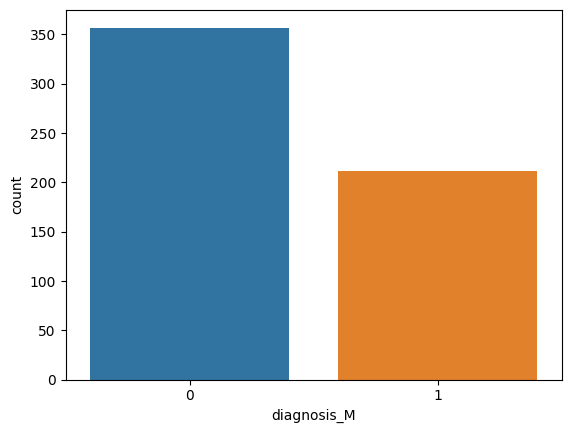

<Figure size 500x400 with 0 Axes>

In [ ]:
#Plotting the plot of count
sns.countplot(data=orig_Data,x='diagnosis_M',label='Count')
plt.figure(figsize=(5,4))

In [ ]:
(orig_Data.diagnosis_M==0).sum()

In [ ]:
(orig_Data.diagnosis_B==0).sum()

# Correlation Matrix and HeatMap

In [ ]:
diag_Data=orig_Data.drop(columns='diagnosis_M')

In [ ]:
diag_Data.head()

In [ ]:
diag_Data.corrwith(orig_Data['diagnosis_M']).plot.bar(figsize=(20,10),title='Correlation with Malignant',rot=45,grid=True)

In [ ]:
#Correlation Matrix
cor_Mat=orig_Data.corr()

In [ ]:
cor_Mat

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(cor_Mat,annot=True)

# Splitting the train and test set

In [ ]:
#Matrix of Features
X=orig_Data.iloc[:,1:-1].values

In [ ]:
X.shape

(569, 31)

In [ ]:
y=orig_Data.iloc[:,-1].values

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

# Building the Model

Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR=LogisticRegression(random_state=0)

In [ ]:
model_LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
predictions_LR=model_LR.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,recall_score

In [ ]:
accuracy_LR=accuracy_score(y_test,predictions_LR)
precision_LR=precision_score(y_test,predictions_LR)
f1_score_LR=f1_score(y_test,predictions_LR)
recall_LR=recall_score(y_test,predictions_LR)

In [ ]:
results_LR=pd.DataFrame([['Logistic Regression',accuracy_LR,precision_LR,f1_score_LR,recall_LR]],
                     columns=['Model','Accuracy','Precision','f1_score','Recall_Score'])

In [ ]:
results_LR

,Model,Accuracy,Precision,f1_score,Recall_Score
0,Logistic Regression,1.0,1.0,1.0,1.0


In [ ]:
cm_LR=confusion_matrix(y_test,predictions_LR)
print(cm_LR)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies_LR=cross_val_score(estimator=model_LR,X=X_train,y=y_train,cv=10)

In [ ]:
print('Accuracy is {:.2F} %'.format(accuracies_LR.mean()*100))
print('Standard Deviation is {:.2F} %'.format(accuracies_LR.std()*100))

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF=RandomForestClassifier(random_state=0)
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
predictions_RF=model_RF.predict(X_test)

In [ ]:
accuracy_RF=accuracy_score(y_test,predictions_RF)
precision_RF=precision_score(y_test,predictions_RF)
f1_score_RF=f1_score(y_test,predictions_RF)
recall_RF=recall_score(y_test,predictions_RF)

In [ ]:
results_RF=pd.DataFrame([['Random Forest Classifier',accuracy_RF,precision_RF,f1_score_RF,recall_RF]],
                     columns=['Model','Accuracy','Precision','f1_score','Recall_Score'])

In [ ]:
results=results_LR.append(results_RF,ignore_index=True)

In [ ]:
results

In [ ]:
cm_RF=confusion_matrix(y_test,predictions_RF)
print(cm_RF)

### Cross Validation

In [ ]:
accuracies_RF=cross_val_score(estimator=model_RF,X=X_train,y=y_train,cv=10)

In [ ]:
print('Accuracy is {:.2F} %'.format(accuracies_RF.mean()*100))
print('Standard Deviation is {:.2F} %'.format(accuracies_RF.std()*100))

Accuracy is 100.00 %
Standard Deviation is 0.00 %


Random Search to find best Parameters (Logistic Regression)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
            'solver':['newton-cg','sag','saga','lbfgs','liblinear']
}

In [ ]:
parameters

In [ ]:
random_search=RandomizedSearchCV(estimator=model_LR,param_distributions=parameters,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

LogisticRegression(random_state=0)

In [ ]:
random_search.best_score_

1.0

In [ ]:
random_search.best_params_

FINAL MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=2.0, penalty='none', random_state=0)
model.fit(X_train,y_train)

In [ ]:
fin_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,fin_pred)
precision=precision_score(y_test,fin_pred)
f1_score=f1_score(y_test,fin_pred)
recall=recall_score(y_test,fin_pred)
results_fin=pd.DataFrame([['Final Logistic Rgression',accuracy,precision,f1_score,recall]],
                     columns=['Model','Accuracy','Precision','f1_score','Recall_Score'])
results=results.append(results_fin,ignore_index=True)
results

### Cross Validation

In [ ]:
accuracies=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
print('Accuracy is {:.2F} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2F} %'.format(accuracies.std()*100))